In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [3]:
# Generate a synthetic dataset
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])


In [4]:
def initialize_centroids(data, k):
    return data[np.random.choice(range(len(data)), k, replace=False)]

def compute_distances(data, centroids):
    return np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

def assign_clusters(distances):
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    return np.array([data[clusters == i].mean(axis=0) for i in range(k)])

def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters


In [5]:
k = 4
centroids, clusters = k_means(data_scaled, k)
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)


Total within-cluster sum of squares:  69.89518426236033


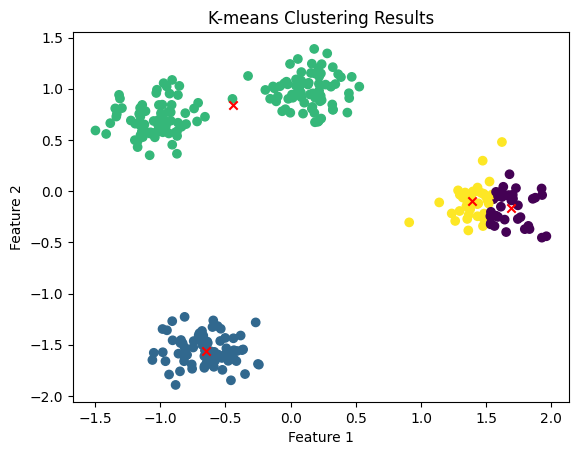

In [6]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

def initialize_medoids(data, k):
    # Randomly select k indices from the data
    medoid_indices = np.random.choice(len(data), k, replace=False)
    medoids = [data[i] for i in medoid_indices]
    return medoids
def compute_dissimilarities(data, medoids):
    dissimilarities = np.zeros((len(data), len(medoids)))
    for i, point in enumerate(data):
        for j, medoid in enumerate(medoids):
            dissimilarities[i, j] = np.linalg.norm(point - medoid)
    return dissimilarities

def assign_clusters(dissimilarities):
    return np.argmin(dissimilarities, axis=1)

def update_medoids(data, clusters, k):
    new_medoids = []
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        total_dissimilarity = np.sum(compute_dissimilarities(cluster_points, cluster_points))
        best_medoid = None
        min_total_dissimilarity = float('inf')
        for point in cluster_points:
            point_dissimilarity = np.sum(compute_dissimilarities([point], cluster_points))
            if point_dissimilarity < min_total_dissimilarity:
                min_total_dissimilarity = point_dissimilarity
                best_medoid = point
        new_medoids.append(best_medoid)
    return new_medoids

def k_medoids(data, k, max_iterations=100):
    medoids = initialize_medoids(data, k)
    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)
        if np.all(np.array(new_medoids) == np.array(medoids)):
            break
        medoids = new_medoids
    return medoids, clusters


k = 4
medoids, clusters = k_medoids(data_scaled, k)

# Plot the results
plt.figure(figsize=(8, 6))
for cluster_id in range(k):
    cluster_points = data_scaled[clusters == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}")
plt.scatter(np.array(medoids)[:, 0], np.array(medoids)[:, 1], marker='x', color='red', s=100, label="Medoids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Medoids Clustering")
plt.legend()
plt.show()